In [1]:
import numpy as np
import matplotlib.pyplot as plt

find eigen values of a matrix

In [2]:
def find_eigenValues(A,lis=False):
    if lis:
        A = np.array(A)
    eigen_val, eigen_vec = np.linalg.eig(A)

    return eigen_val, eigen_vec

example taken from https://lpsa.swarthmore.edu/MtrxVibe/EigMat/MatrixEigen.html

In [3]:
A = np.array([[0,1],[-2,-3]])
print(A)
val, vec = find_eigenValues(A)
'''
The normalized (unit “length”) eigenvectors, 
such that the column v[:,i] is the eigenvector corresponding to the eigenvalue w[i].
'''
print('eigen val: {}\neigen vec: {}'.format(val,vec))

[[ 0  1]
 [-2 -3]]
eigen val: [-1. -2.]
eigen vec: [[ 0.70710678 -0.4472136 ]
 [-0.70710678  0.89442719]]


normalise a vector

In [4]:
def normalize(v):
    norm = np.linalg.norm(v)
    v_n = v/norm
    print(f'v {v}, ||v|| = {norm} v_n = {v_n}')
    return v_n

In [5]:
e_0 = np.array([1,-1])
e_1 = np.array([-1,2])
print (np.all(normalize(e_0) == vec[:,0]), vec[:,0])
print (np.all(normalize(e_1) == vec[:,1]))

v [ 1 -1], ||v|| = 1.4142135623730951 v_n = [ 0.70710678 -0.70710678]
True [ 0.70710678 -0.70710678]
v [-1  2], ||v|| = 2.23606797749979 v_n = [-0.4472136   0.89442719]
True


$A.v = \lambda.v$

In [6]:
larger_eval_idx = np.argmax(val)
print(larger_eval_idx)
larger_evec = vec[:, larger_eval_idx]
print(f'larger_evec {larger_evec}')

0
larger_evec [ 0.70710678 -0.70710678]


In [7]:
A_v = A.dot(larger_evec)
print(A_v)

[-0.70710678  0.70710678]


In [8]:
val0_v = val[larger_eval_idx]*larger_evec
print(val0_v)

[-0.70710678  0.70710678]


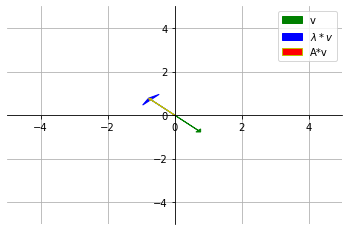

In [9]:
ub,lb = -5,5

ax = plt.axes()
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.axis([ub, lb, ub, lb])

# larger eigen vector, v
a1 = ax.arrow(0, 0, larger_evec[0],larger_evec[1], head_width=0.2, head_length=0.1, fc='g', ec='g') 

# val0 = lambda_0 ; val0*v
a2 = ax.arrow(0, 0, val0_v[0],val0_v[1], head_width=0.7, head_length=0.1, fc='b', ec='b')

# A*v
a3 = ax.arrow(0, 0, A_v[0],A_v[1], head_width=0.1, head_length=0.1, fc='r', ec='y') 

plt.legend([a1,a2,a3,], ['v',r'$\lambda*v$',r'A*v'])
plt.grid()
plt.show()